In [1]:
import markdown
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np

# Importing necessary libraries and packages

# Kutay Ilmen Aytekin - 2017402105

## IE 360 Statistical Forecasting and Time Series HW1

In this homework, I worked with a dataset including the data of the total industrial production, workforce, commercial interest rate and with opening and closing firms, increase in number of firms in Turkey from 2014 to 2022. I used df.plot() and multiplots for visualizations. I expect to observe that there is a relationship between the measures I worked with. I made corrections in the data for column names and the increase in the number of firms at the very beginning as well. Then, I exported 'iş'(job), 'şirket nasıl açılır'(how to open a company), and 'ticari kredi'(commercial loan) from the Google Trends. I tried to conclude the relationships between the measures I used from the central bank data. 

In [2]:
df = pd.read_excel("Kutay Ilmen Aytekin ie360 Hw1 Data.xlsx")
df.head() # Reading the data from the excel I got from the central bank data

,DATE,TOTAL INDUSTRY PRODUCTION,WORKFORCE,COMMERCIAL INTEREST RATE,OPENIN FIRMS,CLOSING FIRMS,INCREASE IN NUMBER OF FIRMS
0,2014-01,87.543106,24210,13.2480,5916.0,2892.0,3024.0
1,2014-02,83.362027,24563,15.4500,4771.0,1181.0,3590.0
2,2014-03,93.893018,25634,16.0625,5026.0,1073.0,3953.0
3,2014-04,92.890093,25937,15.0625,4959.0,937.0,4022.0
4,2014-05,94.26207,26298,14.1520,4768.0,968.0,3800.0


In [3]:
#df.tail(36) #  The last 36 rows are unnecessary explanation of the data so I removed that part
df.drop(df.tail(36).index,inplace=True) 

In [4]:
df['DATE'] = pd.to_datetime(df['DATE'], format= '%Y-%m-%d') # I changed the date to date format

In [5]:
df2 = df[['DATE', 'TOTAL INDUSTRY PRODUCTION']]
df3 = df[['DATE', 'WORKFORCE']]
df4 = df[['DATE', 'COMMERCIAL INTEREST RATE']]
df5 = df[['DATE', 'INCREASE IN NUMBER OF FIRMS']]

# Here, I created new dataframes for different measures I will use

In [6]:
df2['TOTAL INDUSTRY PRODUCTION'] = df2['TOTAL INDUSTRY PRODUCTION'].astype(int) 
df3['WORKFORCE'] = df3['WORKFORCE'].astype(int) 
df4['COMMERCIAL INTEREST RATE'] = df4['COMMERCIAL INTEREST RATE'].astype(int) 
df5['INCREASE IN NUMBER OF FIRMS'] = df5['INCREASE IN NUMBER OF FIRMS'].astype(int) 

# I converted string values to the integer values here

/var/folders/d3/_yjvp43j5lzchh7tn968jtfw0000gn/T/ipykernel_4551/1431326753.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TOTAL INDUSTRY PRODUCTION'] = df2['TOTAL INDUSTRY PRODUCTION'].astype(int)
/var/folders/d3/_yjvp43j5lzchh7tn968jtfw0000gn/T/ipykernel_4551/1431326753.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['WORKFORCE'] = df3['WORKFORCE'].astype(int)
/var/folders/d3/_yjvp43j5lzchh7tn968jtfw0000gn/T/ipykernel_4551/1431326753.py:3: SettingWithCopyWarning: 
A value is trying to be 

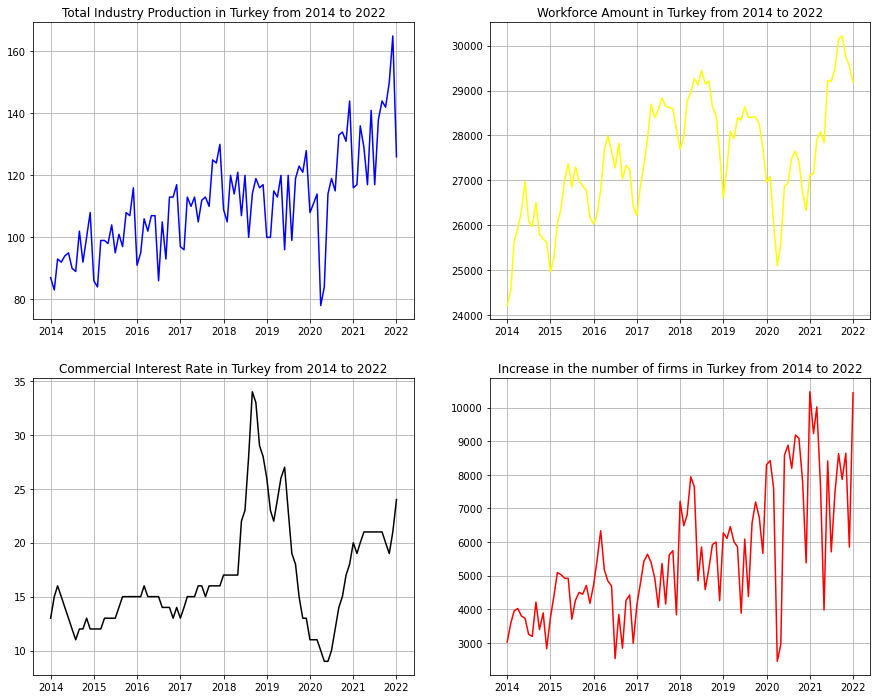

In [7]:
plt.rcParams['figure.figsize'] = [15, 12]  # I made the size of the plot bigger

plt.subplot(2, 2, 1)
plt.plot(df2['DATE'] , df2['TOTAL INDUSTRY PRODUCTION'], color = "blue")
plt.title("Total Industry Production in Turkey from 2014 to 2022")
plt.grid()

plt.subplot(2, 2, 2)
plt.plot(df3['DATE'], df3['WORKFORCE'], color = "yellow")
plt.title("Workforce Amount in Turkey from 2014 to 2022")
plt.grid()

plt.subplot(2, 2, 3)
plt.plot(df4['DATE'], df4['COMMERCIAL INTEREST RATE'], color = "black")
plt.title("Commercial Interest Rate in Turkey from 2014 to 2022")
plt.grid()

plt.subplot(2, 2, 4)
plt.plot(df5['DATE'], df5['INCREASE IN NUMBER OF FIRMS'], color = "red")
plt.title("Increase in the number of firms in Turkey from 2014 to 2022")
plt.grid()

plt.show()

# In this code chunk, I plotted the measures at the same time to observe the data, and reach conclusions and comment.

In the total industry production in Turkey data, the average monthly production in 2015 is accepted as 100. The amount of change in the amount of production in other years compared to 2015 is shown on the y-axis of the graph. On the y-axis of the other graphs the actual quantities are shown.

- When I check all of the plots, covid 19 pandemic effect can be seen easily just after the year 2020. In the years when the pandemic effect was not seen, there is a strong trend between the years 2014 and 2022 except for commercial interest rates. The fact that Turkey is a developing country is effective in this trend. 

- Also, I see a clear seasonability effect on the industry production and workforce data. While production and workforce increase in the summer months, there is a decrease in production and workforce in the winter months. The fact that Turkey is an agricultural country is important in this regard. 

#### Google Trends Analysis

After this point, I will work with the Google Trends Data and make comments by plotting simultaneously.

In [8]:
df_is = pd.read_csv("is.csv", header=0) # Reading the data

In [9]:
df_is.head() # Check

,Kategori: Tüm kategoriler
Ay,iş: (Türkiye)
2014-01,81
2014-02,81
2014-03,75
2014-04,78


In [10]:
df_is = pd.DataFrame(df_is["Kategori: Tüm kategoriler"].values, index = df_is.index)
df_is = pd.DataFrame(df_is[1::].values, index = df_is.index[1::])
df_is.columns = ["Job_Search_Volume"] # Column Name Change
df_is.index.name = "Date" # Index name change
df_is['Job_Search_Volume'] = df_is['Job_Search_Volume'].astype(int) # Make the values integer
df_is = df_is.reset_index() # To change the index for the usability
df_is['Date'] = pd.to_datetime(df_is['Date'], format = '%Y-%m-%d') # Format change in Date
df_is.head() # check

,Date,Job_Search_Volume
0,2014-01-01,81
1,2014-02-01,81
2,2014-03-01,75
3,2014-04-01,78
4,2014-05-01,75


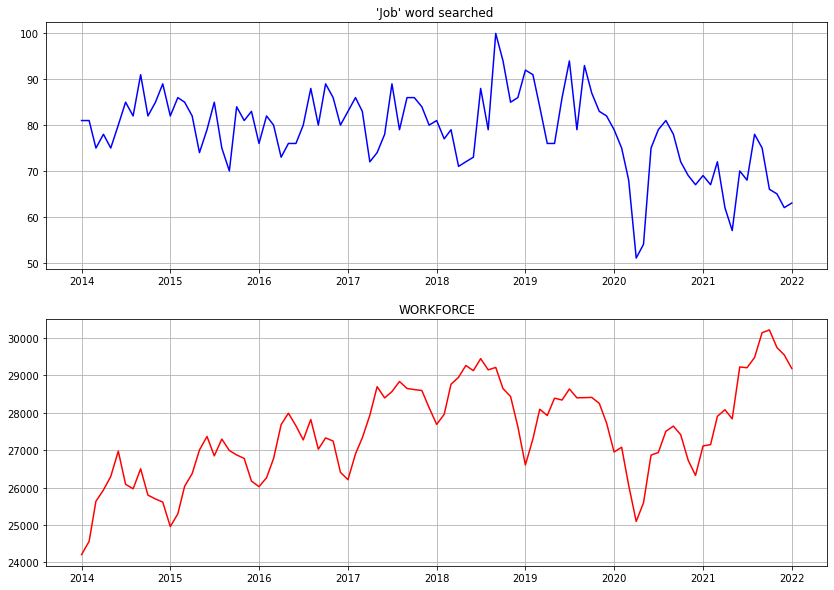

In [11]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(df_is['Date'], df_is['Job_Search_Volume'], color = "blue")
plt.title("'Job' word searched ")
plt.grid()
plt.subplot(2, 1, 2)
plt.plot(df3['DATE'], df3['WORKFORCE'], color = "red")
plt.title("WORKFORCE")
plt.grid()

# Plotting

I thought that, If someone wants to enter a job, they must apply before entering that job. The most basic method to make this application is to search for the job word on google. I expected to see a similar trend with the workforce data but I could not see a strong trend on the Google Trends data.
- When I check the Turkish word 'iş' on Google trends, I see a similar seasonality effect with the workforce data.

- Also, sharp decrease during the covid 19 period can be seen as well on both plots. 

In [12]:
df_open = pd.read_csv("Howtoopencompany.csv", header=0)
df_open.head()

,Kategori: Tüm kategoriler
Ay,Şirket Nasıl Açılır: (Türkiye)
2014-01,29
2014-02,77
2014-03,39
2014-04,21


In [13]:
df_open = pd.DataFrame(df_open["Kategori: Tüm kategoriler"].values, index = df_open.index)
df_open = pd.DataFrame(df_open[1::].values, index = df_open.index[1::])
df_open.columns = ["Company_Search_Volume"]
df_open.index.name = "Date"
df_open['Company_Search_Volume'] = df_open['Company_Search_Volume'].astype(int)
df_open = df_open.reset_index()
df_open['Date'] = pd.to_datetime(df_open['Date'], format = '%Y-%m-%d') # Format change in Date
df_open.head()

,Date,Company_Search_Volume
0,2014-01-01,29
1,2014-02-01,77
2,2014-03-01,39
3,2014-04-01,21
4,2014-05-01,31


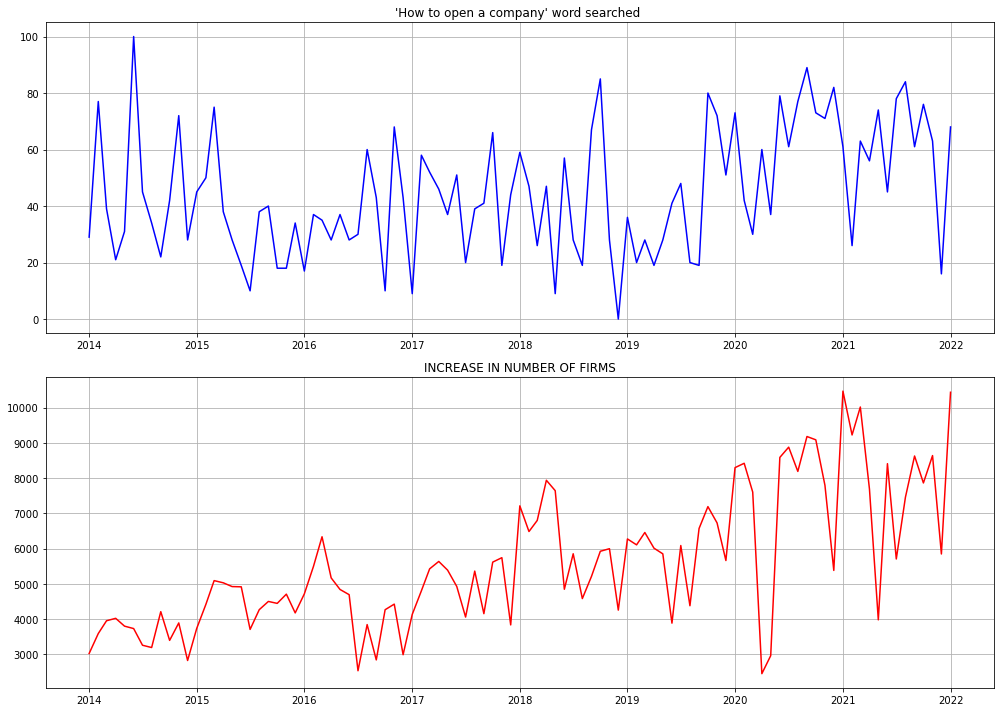

In [14]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(df_open['Date'], df_open['Company_Search_Volume'], color = "blue")
plt.title("'How to open a company' word searched ")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df5['DATE'], df5['INCREASE IN NUMBER OF FIRMS'], color = "red")
plt.title("INCREASE IN NUMBER OF FIRMS")
plt.grid()

plt.tight_layout()
plt.show()

I derived the data "increase in number of firms" by subtracting closing firms from the opening firms data. For someone considering starting a firm, the google search engine is one of the first places to go to learn the process. That is why, I checked for the Turkish sentence "Nasıl şirket açılır?" from Google Trends. 

-  I see a similar seasonality effect with the increase in number of firms data. Besides that similarity, I could not see a trend in Google Trends data. 

- Also, surprisingly Covid 19 effect can not be seen clearly on Google Trends data. 


In [15]:
df_loan = pd.read_csv("loan.csv", header=0)
df_loan.head()

,Kategori: Tüm kategoriler
Ay,ticari kredi: (Türkiye)
2014-01,28
2014-02,27
2014-03,28
2014-04,32


In [16]:
df_loan = pd.DataFrame(df_loan["Kategori: Tüm kategoriler"].values, index = df_loan.index)
df_loan = pd.DataFrame(df_loan[1::].values, index = df_loan.index[1::])
df_loan.columns = ["Commercial Loan"]
df_loan.index.name = "Date"
df_loan['Commercial Loan'] = df_loan['Commercial Loan'].astype(int)
df_loan = df_loan.reset_index()
df_loan['Date'] = pd.to_datetime(df_loan['Date'], format = '%Y-%m-%d') # Format change in Date
df_loan.head()

,Date,Commercial Loan
0,2014-01-01,28
1,2014-02-01,27
2,2014-03-01,28
3,2014-04-01,32
4,2014-05-01,37


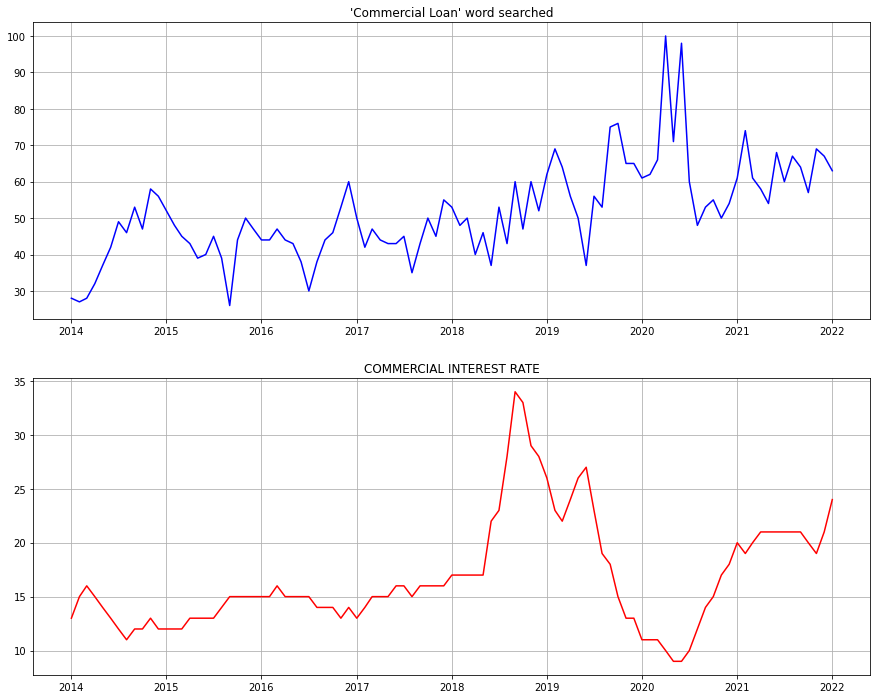

In [17]:
plt.subplot(2, 1, 1)
plt.plot(df_loan['Date'], df_loan['Commercial Loan'], color = "blue")
plt.title("'Commercial Loan' word searched")
plt.grid()

plt.subplot(2, 1, 2)
plt.plot(df4['DATE'], df4['COMMERCIAL INTEREST RATE'], color = "red")
plt.title("COMMERCIAL INTEREST RATE")
plt.grid()

I especially choose a very related word with the commercial interest rate data derived from TCMB to see the similar trend clearly. As I expect, there was a very similar trend except for the covid 19 term. 

### Final Observations / Conclusion

To conclude, 

- There are certain relationships between the measures I analyzed.

- Covid 19 effect can be seen easily on all data plots. 

- Also, besides the interest rate data, seasonality effect is available for all other data. Summer months are more productive months for Turkey while winters are less productive. Even there is a seasonality, general trend can be observed on all plots. 
